# Stock Market prediction And Forecasting using stacked LSTM

Data = https://www.canva.com/link?target=https%3A%2F%2Fraw.githubusercontent.com%2Fmwitiderrick%2Fstockprice%2Fmaster%2FNSE-TATAGLOBAL.csv&design=DAEjrwWV35w&accessRole=viewer&linkSource=document

In this project, I've used LSTM(Long Short Term memory) a machine learning model for stock market prediction. Stock market prediction is the art of trying to determine the future value of a company's stock. 

*1. importing the required libraries*

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error


In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [11]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [12]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


*2. Sorting datset according to date*

In [13]:
data.Date = pd.to_datetime(data.Date)
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


*3. putting index in order*

In [14]:
df.reset_index(inplace=True)

In [15]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


*4. Plotting the graph of stock at close*

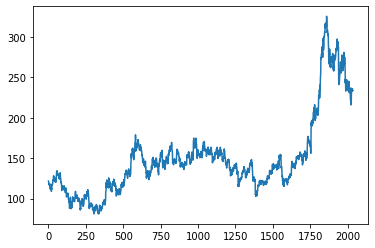

In [16]:
plt.plot(df.Close)

In [17]:
df1 = df.Close

*5. Feature Scaling*

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

*6. Splitting the data into training and test data*


In [20]:
train_size = int(len(df1)*0.70)
test_size = len(df1)-train_size

train_data = df1[0:train_size,:]
test_data = df1[train_size:len(df1), :1]

In [21]:
train_size, test_size

(1424, 611)

In [22]:
def datasetcrtd(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 100
x_train, y_train = datasetcrtd(train_data, time_step)
x_test, y_test = datasetcrtd(test_data, time_step)

In [24]:
print(x_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

*7. Reshaping the input required for LSTM*

In [25]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

*8. Building the model*

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 6s 154ms/step - loss: 0.0085 - val_loss: 0.0022
Epoch 2/60
19/19 [==============================] - 2s 104ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 2s 115ms/step - loss: 8.9003e-04 - val_loss: 0.0011
Epoch 4/60
19/19 [==============================] - 2s 108ms/step - loss: 8.1315e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 2s 111ms/step - loss: 7.8107e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 2s 116ms/step - loss: 7.4543e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 2s 119ms/step - loss: 7.4097e-04 - val_loss: 9.9285e-04
Epoch 8/60
19/19 [==============================] - 2s 112ms/step - loss: 7.2823e-04 - val_loss: 9.4879e-04
Epoch 9/60
19/19 [==============================] - 2s 124ms/step - loss: 7.0416e-04 - val_loss: 8.4320e-04
Epoch 10/60
19/19 [==============================] - 3s 135m

In [30]:
#prediction of scaled test set
test_predict = model.predict(x_test)

16/16 [==============================] - 1s 21ms/step


In [31]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [32]:
test_predict1

array([[142.7676  ],
       [142.95584 ],
       [142.05113 ],
       [139.36194 ],
       [137.67775 ],
       [137.14024 ],
       [138.33151 ],
       [139.93407 ],
       [140.35191 ],
       [139.98302 ],
       [139.72995 ],
       [140.91286 ],
       [141.72498 ],
       [143.29742 ],
       [145.49977 ],
       [143.47997 ],
       [140.97887 ],
       [140.55818 ],
       [141.18729 ],
       [146.21518 ],
       [150.6958  ],
       [152.88556 ],
       [153.20296 ],
       [151.07932 ],
       [150.81734 ],
       [150.58354 ],
       [150.98332 ],
       [152.6762  ],
       [153.42389 ],
       [153.41785 ],
       [153.79355 ],
       [152.64023 ],
       [149.39546 ],
       [143.70828 ],
       [140.2863  ],
       [139.32007 ],
       [139.5041  ],
       [138.74112 ],
       [136.46942 ],
       [132.81952 ],
       [130.29193 ],
       [129.09425 ],
       [127.04564 ],
       [126.19973 ],
       [124.19675 ],
       [121.583015],
       [120.810875],
       [120.4

*8. Performance*

In [35]:
performance = math.sqrt(mean_squared_error(y_test,test_predict))
performance

0.04779596062115791